In [17]:
#importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import quad
from scipy.stats import gaussian_kde


In [18]:

# Read the CSV file containing surface brightness data
data = pd.read_csv('R-Band.csv')

# Assuming the CSV file has columns 'radius' (in arcsec) and 'surface_brightness' (in mag/arcsec^2)
radius = data['Radius'].values
surface_brightness = data['Surface Brightness'].values

In [19]:
print(data.columns.tolist()) 

['Radius', 'Surface Brightness', 'Surface_Brightness', 'conversion S ', ' Radius_pc']


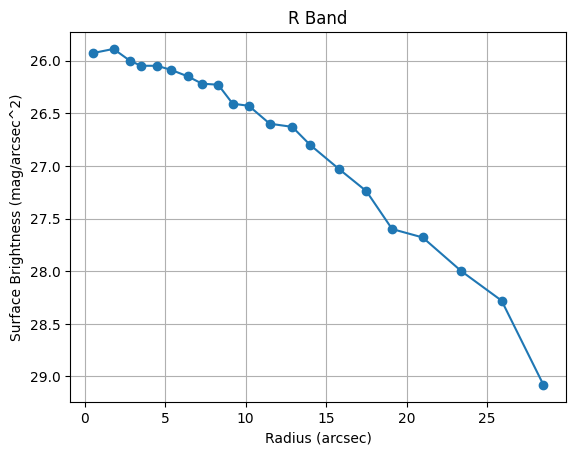

In [20]:
#Display Plot 
x1 = data["Radius"]
y1 = data["Surface Brightness"]


plt.plot(x1, y1, marker="o")
#, facecolors="blue", edgecolors="blue")
plt.xlabel('Radius (arcsec)')
plt.ylabel('Surface Brightness (mag/arcsec^2)')
plt.title('R Band')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

In [21]:
# Constants
solar_r_absolute_mag = 4.67  # Solar r absolute magnitude
distance_to_galaxy_pc = 300000000*0.30660  # Example distance to the galaxy in parsecs(multiply 300,000,000 ly to parsec)

# Convert arcsec to parsecs
radius_pc = radius * distance_to_galaxy_pc * (1 / 3600)  # 1 arcsec = 1/3600 degrees

# Calculate L_sun/pc^2
l_sun_pc2 = 10**(-0.4 * (surface_brightness - solar_r_absolute_mag))

In [22]:
#PLOTTING THE CONVERTED VALUES

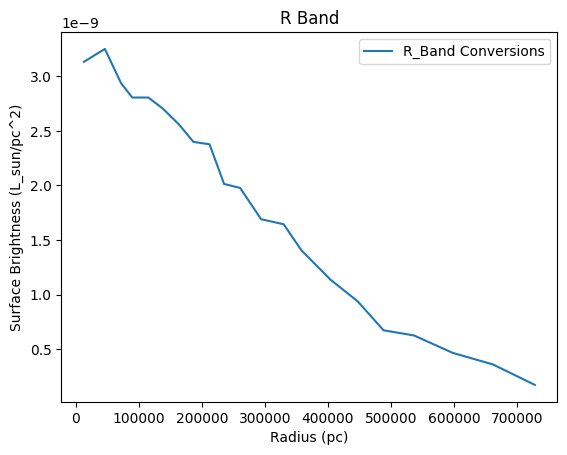

In [25]:

#plt.figure(figsize=(8, 6))
plt.plot(radius_pc, l_sun_pc2, label='R_Band Conversions')
plt.xlabel('Radius (pc)')
plt.ylabel('Surface Brightness (L_sun/pc^2)')
plt.title('R Band')
plt.legend()
plt.show()

In [26]:
# Extrapolate inward and outward using the first and last few points
# Use a simple linear interpolation for simplicity, actual methods may vary
# You can also use numpy.interp or scipy.interpolate for more sophisticated interpolation

# Example of linear extrapolation
inward_slope = (l_sun_pc2[1] - l_sun_pc2[0]) / (radius_pc[1] - radius_pc[0])
outward_slope = (l_sun_pc2[-1] - l_sun_pc2[-2]) / (radius_pc[-1] - radius_pc[-2])

# Generate smoothed d(SB)/dr array
dSB_dr = np.zeros_like(radius_pc)
dSB_dr[0] = inward_slope
dSB_dr[1:-1] = (l_sun_pc2[2:] - l_sun_pc2[:-2]) / (radius_pc[2:] - radius_pc[:-2])
dSB_dr[-1] = outward_slope

In [30]:
# Define a new array of radii for the 3D density profile
r_3d_values = np.linspace(0, 2 * radius_pc[-1], 2000)  # Example of a large range of radii

In [31]:
from scipy.integrate import quad

def integrand(R):
    return -1 / np.pi * np.interp(R, radius_pc, dSB_dr) / np.sqrt(R**2 - r_3d**2)

volume_density = []
for r_3d in r_3d_values:
    integral, _ = quad(integrand, r_3d, np.inf)
    volume_density.append(integral)

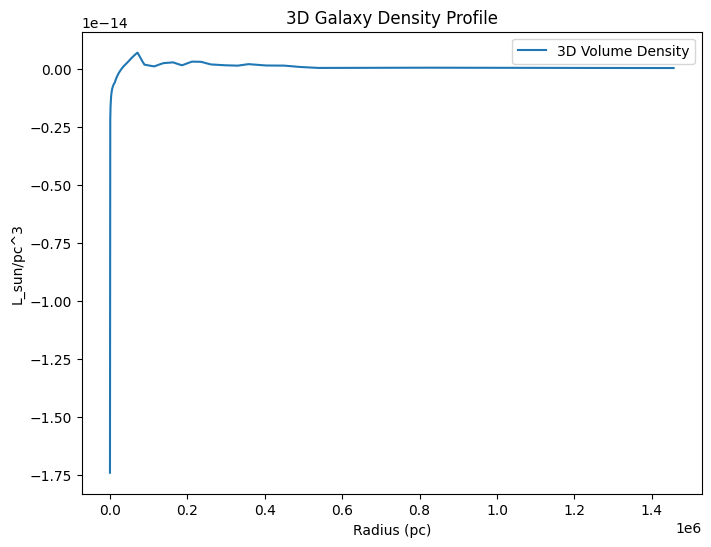

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(r_3d_values, volume_density, label='3D Volume Density')
plt.xlabel('Radius (pc)')
plt.ylabel('L_sun/pc^3')
plt.title('3D Galaxy Density Profile')
plt.legend()
plt.show()